In [1]:
from src.mimo_channel import generate_rayleigh_mimo_channel
from src.mimo_modulator import mimo_ofdm_transmit
from src.mimo_transmission import transmit_through_mimo_channel
from src.mimo_equalization import zero_forcing_equalizer, mmse_equalizer
from src.alamouti_encoder import alamouti_encode, alamouti_decode
from src.ber_analysis import ber_vs_snr

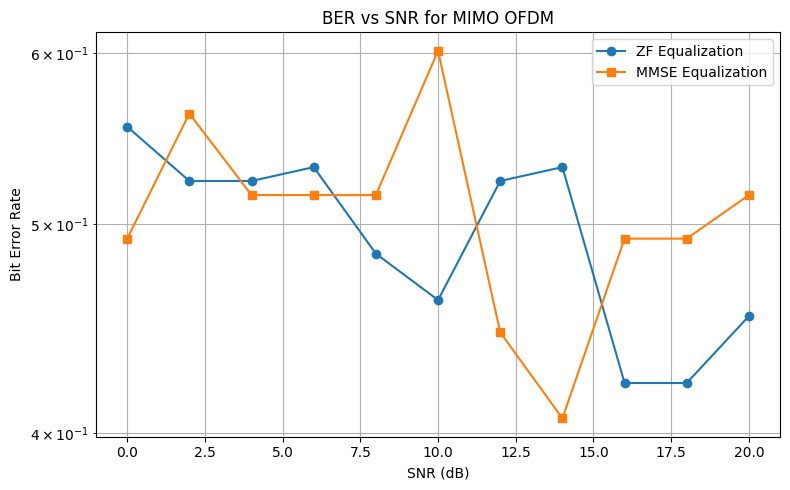

In [2]:
import matplotlib.pyplot as plt

# Run simulations
snr_range, ber_zf = ber_vs_snr(scheme='zf')
snr_range, ber_mmse = ber_vs_snr(scheme='mmse')

# Plot
plt.figure(figsize=(8, 5))
plt.semilogy(snr_range, ber_zf, 'o-', label='ZF Equalization')
plt.semilogy(snr_range, ber_mmse, 's-', label='MMSE Equalization')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate')
plt.title('BER vs SNR for MIMO OFDM')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('plots_day_4/ber_mimo_equalization.png')
plt.show()

In [3]:
import os
os.makedirs('plots_day_4', exist_ok=True)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure output folder exists
os.makedirs('plots_day_4', exist_ok=True)

# Import your simulation functions
from src.ber_analysis import ber_vs_snr
from src.mimo_equalization import zero_forcing_equalizer

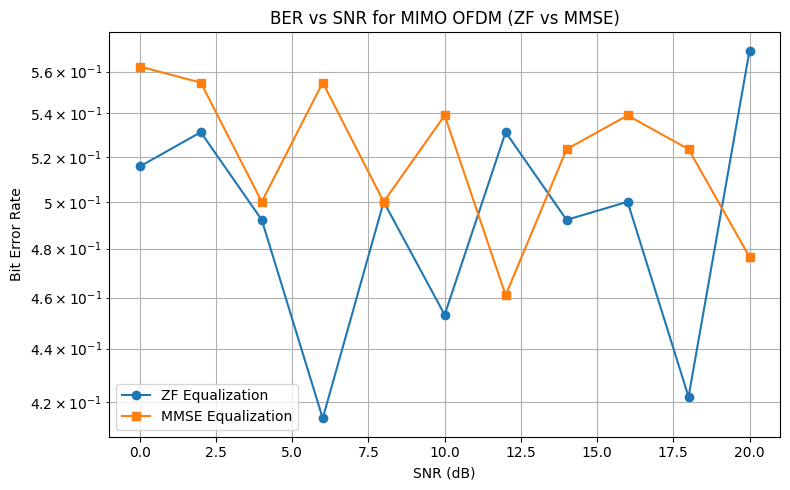

In [5]:
snr_range, ber_zf = ber_vs_snr(scheme='zf')
snr_range, ber_mmse = ber_vs_snr(scheme='mmse')

plt.figure(figsize=(8, 5))
plt.semilogy(snr_range, ber_zf, 'o-', label='ZF Equalization')
plt.semilogy(snr_range, ber_mmse, 's-', label='MMSE Equalization')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate')
plt.title('BER vs SNR for MIMO OFDM (ZF vs MMSE)')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('plots_day_4/ber_mimo_equalization.png')
plt.show()

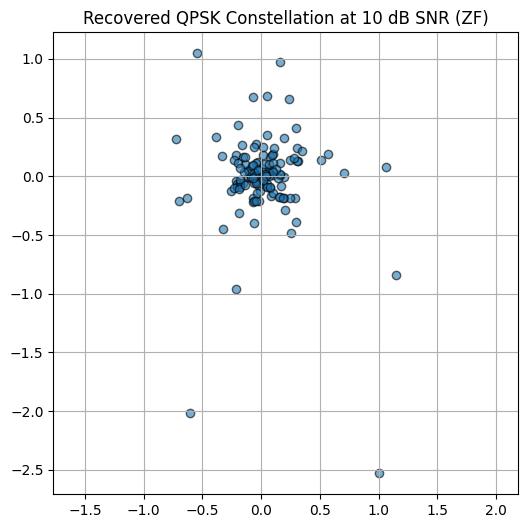

In [6]:
from src.mimo_channel import generate_rayleigh_mimo_channel
from src.mimo_modulator import mimo_ofdm_transmit
from src.mimo_transmission import transmit_through_mimo_channel

# Generate one-shot constellation recovery at 10 dB
bits_tx1 = np.random.randint(0, 2, 128)
bits_tx2 = np.random.randint(0, 2, 128)
tx1, tx2 = mimo_ofdm_transmit(bits_tx1, bits_tx2)
H = generate_rayleigh_mimo_channel(64)
rx = transmit_through_mimo_channel(tx1, tx2, H, snr_db=10)

recovered_symbols = []
cp_len = 16
for blk in range(rx.shape[0]):
    for sc in range(64):
        y = np.array([rx[blk, cp_len + sc, 0], rx[blk, cp_len + sc, 1]])
        h = H[sc]
        x_hat = zero_forcing_equalizer(h, y)
        recovered_symbols.extend(x_hat)

plt.figure(figsize=(6, 6))
plt.scatter(np.real(recovered_symbols), np.imag(recovered_symbols), alpha=0.6, edgecolors='k')
plt.title("Recovered QPSK Constellation at 10 dB SNR (ZF)")
plt.grid(True)
plt.axis('equal')
plt.savefig('plots_day_4/constellation_zf_10dB.png')
plt.show()

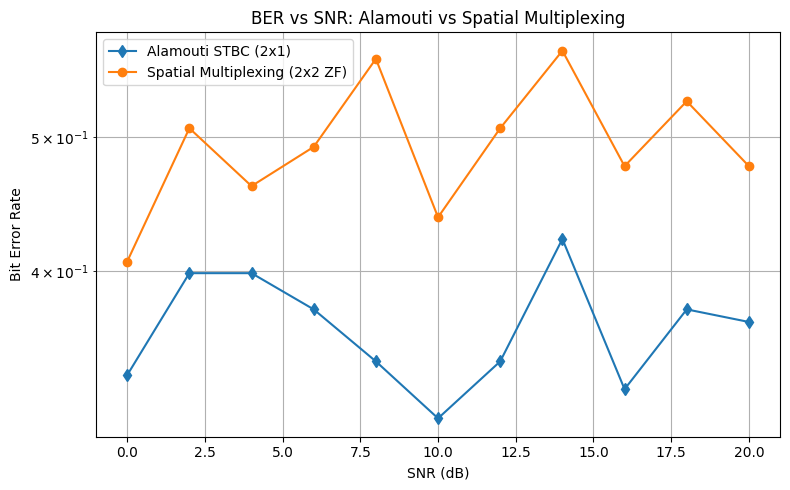

In [7]:
from src.ber_analysis import ber_vs_snr_alamouti

snr_range, ber_alamouti = ber_vs_snr_alamouti()
snr_range, ber_multiplexing = ber_vs_snr(scheme='zf')

plt.figure(figsize=(8, 5))
plt.semilogy(snr_range, ber_alamouti, 'd-', label='Alamouti STBC (2x1)')
plt.semilogy(snr_range, ber_multiplexing, 'o-', label='Spatial Multiplexing (2x2 ZF)')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate')
plt.title('BER vs SNR: Alamouti vs Spatial Multiplexing')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('plots_day_4/ber_alamouti_vs_multiplexing.png')
plt.show()